In [1]:
from google.colab import files, drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Dataset Loading and Data Inspection

In [2]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy 
import pandas as pd
import warnings
import re
warnings.filterwarnings("ignore")
numpy.random.seed(8)

# Import dataset
fname = '/content/drive/MyDrive/lab2/tweets_train_validation.txt' 
tweet = pd.read_csv(fname, encoding='iso-8859-1', lineterminator='\n') # Read txt file
tweet.isnull().values.any() # Check if the dataset contains any NULL value 

False

In [3]:
tweet.shape

(99989, 2)

In [4]:
tweet.columns 

Index(['Sentiment', 'SentimentText'], dtype='object')

In [5]:
tweet.head(10)

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow :-| ...
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)


In [6]:
tweet["SentimentText"][5]

'         or i just worry too much?        '

In [7]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      99989 non-null  int64 
 1   SentimentText  99989 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


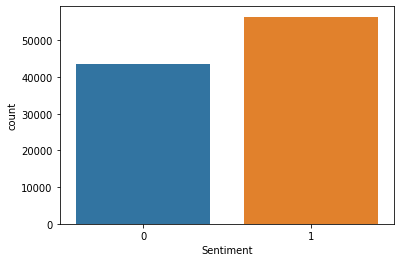

In [8]:
import seaborn as sns
sns.countplot(x='Sentiment', data=tweet) # A little bit more of inspection here.
# We can see there are more positive sentiment texts than negative ones

According to the data inspection, this tweets_train_validation.csv file has around 100,000 tweets in total. Each tweet has two columns: sentiment text and the corresponding sentiment label (0: negative, 1: positive). 

# 2. Data Preprocessing

In [9]:
cleaned_sen = [] # Created a cleaned sentences to store the sentiment texts after the clean process
sentences = tweet.SentimentText.values
preprocess = re.compile("(https*\S+)|(@\S+)|(#\S+)|(\'\w+)|([^\w\s])|(\w*\d+\w*)|(\s{2,})") # Process for removing tags and symbols

def preprocess_text(sen):
  sentences = remove_tags(sen) # Remove html tags, in our case there seems no such tags
  sentences = re.sub('[^a-zA-Z]', ' ', sentences) # Remove punctuations and numbers
  sentences = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentences) # Remove single character
  sentences = re.sub(r'\s+', ' ', sentences) # Remove multiple spaces
  return sentences
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

for text in sentences:
  cleaned_line = preprocess.sub(' ', text) # Recall the preprocess line above
  cleaned_line = cleaned_line.strip().lower().encode('ascii', 'ignore').decode() # Converted to lower cases, remove extra spaces, etc
  cleaned_sen.append(cleaned_line)

cleaned_sen[:20] # From the output, we can see that the tags, puncuations and numbers have been mostly removed. We are only left with alphabets

['is so sad for my apl friend',
 'i missed the new moon trailer',
 'omg its already      o',
 'omgaga  im sooo im gunna cry  i  been at this dentist since     i was suposed   just get a crown put on',
 'i think mi bf is cheating on me    t_t',
 'or i just worry too much',
 'juuuuuuuuuuuuuuuuussssst chillin',
 'sunny again work tomorrow     tv tonight',
 'handed in my uniform today   i miss you already',
 'hmmmm     i wonder how she my number',
 'i must think about positive',
 'thanks to all the haters up in my face all day',
 'this weekend has sucked so far',
 'jb isnt showing in australia any more',
 'ok thats it you win',
 'lt          this is the way i feel right now',
 'awhhe man     i  completely useless rt now  funny all i can do is twitter',
 'feeling strangely fine  now i  gonna go listen to some semisonic to celebrate',
 'huge roll of thunder just now   so scary',
 'i just cut my beard off  it  only been growing for well over a year  i  gonna start it over    is happy in the m

In [10]:
Y = tweet['Sentiment']
# Y = np.array(list(map(lambda x:'postive' if x==1 else 'negative', Y)))
Y[2]

1

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# The script below uses tfidf and then divides our data into 80% for the training set and 20% for the testing set
vectorizer = TfidfVectorizer(stop_words='english', max_features=8000, ngram_range=(1,1))
X_train = vectorizer.fit_transform(cleaned_sen)[:80000].A 
Y_train = tweet.Sentiment[:80000] 
X_test = vectorizer.fit_transform(cleaned_sen)[80000:].A
Y_test = tweet.Sentiment[80000:]
# The train set will be used to train our learning model while the testing set will be used to evalute hoe well our model performs

#3. Define and Compile Model

Models in Keras are defined as a sequence of layers. In this lab, we will use a fully-connected network structure.

In [12]:
model = Sequential()
# model.add(Dense(12,input_dim=8, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # Could test different embedding layer by editing this part

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 4. Fit Model

In [13]:
model.fit(X_train,Y_train, epochs=15, batch_size=2000) 
# We use fit method to train our fully connected neural network. At the end of training, we can see that the training accuracy is around 78%

Epoch 1/15
40/40 [==============================] - 4s 71ms/step - loss: 0.6874 - accuracy: 0.5573
Epoch 2/15
40/40 [==============================] - 3s 72ms/step - loss: 0.6711 - accuracy: 0.6003
Epoch 3/15
40/40 [==============================] - 3s 71ms/step - loss: 0.6496 - accuracy: 0.6748
Epoch 4/15
40/40 [==============================] - 3s 71ms/step - loss: 0.6244 - accuracy: 0.7237
Epoch 5/15
40/40 [==============================] - 3s 70ms/step - loss: 0.5976 - accuracy: 0.7465
Epoch 6/15
40/40 [==============================] - 3s 71ms/step - loss: 0.5720 - accuracy: 0.7563
Epoch 7/15
40/40 [==============================] - 3s 71ms/step - loss: 0.5495 - accuracy: 0.7621
Epoch 8/15
40/40 [==============================] - 3s 71ms/step - loss: 0.5305 - accuracy: 0.7661
Epoch 9/15
40/40 [==============================] - 3s 71ms/step - loss: 0.5152 - accuracy: 0.7685
Epoch 10/15
40/40 [==============================] - 3s 70ms/step - loss: 0.5029 - accuracy: 0.7710
Epoch 11/

#5. Evaluate Model

In [14]:
# To evaluate the performance of the model, we can simply pass the test to the evaluate method of our model.
# To check the test accuracy and loss, execute the script and we can see that we get a test accuracy of 74%
# Our training accuaracy was 78%. This means that our model is slightly overfitting on the training set.
scores = model.evaluate(X_test, Y_test)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

625/625 [==============================] - 1s 1ms/step - loss: 0.5151 - accuracy: 0.7410
